<a href="https://colab.research.google.com/github/Yuleidy2004/DataSet_Ventas_Compras/blob/main/DATOS_SRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Instalación
2. Identificar fuentes de datos (html) en que la parte estand los datos a descargar
3. descargar los datos de los links de los csv y conectar aun carpeta en google drive
4. Extraer las trablas de los csv y crear un dataframework
5. Mostrar resultados de las estadisticas descriptivas
6. Del ETL pasar a una herramienta de protototipado avanzado

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instalar

In [ ]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
typeguard 4.4.3 requires typing_extensions>=4.14.0, but you have typing-extensions 4.13.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and pla

para extraer los enlaces de descarga de archivos CSV desde la sección “Ventas - Compras”

In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import tempfile
import shutil
import os
import re

# Configurar Chrome sin interfaz gráfica (headless)
opciones = webdriver.ChromeOptions()
opciones.add_argument('--headless')
opciones.add_argument('--no-sandbox')
opciones.add_argument('--disable-dev-shm-usage')

# Crear perfil temporal
temp_dir = tempfile.mkdtemp()
opciones.add_argument(f'--user-data-dir={temp_dir}')

# Iniciar navegador
servicio = Service()
driver = webdriver.Chrome(service=servicio, options=opciones)

try:
    url = "https://www.sri.gob.ec/datasets#Ventas%20-%20Compras"
    driver.get(url)

    # Scroll para cargar contenido dinámico
    for _ in range(10):
        ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
        time.sleep(1)

    time.sleep(5)  # Espera final

    # Extraer todos los enlaces CSV
    links = driver.find_elements(By.XPATH, "//a[contains(@href, '.csv')]")
    enlaces_csv_filtrados = []

    # Rango de años y palabras clave para filtrar
    anios = [str(a) for a in range(2017, 2026)]
    palabras_clave = ['venta', 'compra', 'ventas', 'compras']

    for link in links:
        href = link.get_attribute("href")
        texto = link.text.lower()

        if href and href.endswith(".csv"):
            # Verificar si contiene un año del rango y palabras clave
            if any(anio in href or anio in texto for anio in anios) and \
               any(palabra in href.lower() or palabra in texto for palabra in palabras_clave):
                if href not in enlaces_csv_filtrados:
                    enlaces_csv_filtrados.append(href)

    # Mostrar resultados
    if enlaces_csv_filtrados:
        print(f"✅ Se encontraron {len(enlaces_csv_filtrados)} enlaces de 'Ventas-Compras' entre 2017 y 2025:")
        for enlace in enlaces_csv_filtrados:
            print(enlace)
    else:
        print("⚠️ No se encontraron enlaces que coincidan con el filtro.")

except Exception as e:
    print("❌ Error:", e)
finally:
    driver.quit()
    shutil.rmtree(temp_dir)



✅ Se encontraron 9 enlaces de 'Ventas-Compras' entre 2017 y 2025:
https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/41a94fef-2f40-46b3-8b8b-8a1621467b6a/sri_ventas_2025.csv
https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/a18b93ec-4411-423f-8d7f-5938961bc66d/sri_ventas_2024.csv
https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/ade6a4e3-42ab-4a42-a2c9-0280d9fba87b/sri_ventas_2023.csv
https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/a4af5b66-16e5-4837-a70b-e0901e12d8ad/sri_ventas_2022.csv
https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/76a2993b-0b95-43a1-9686-b6158ad628d4/sri_ventas_2021.csv
https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/1d7b1815-1a42-4158-865f-f2ebbe132018/sri_ventas_2020.csv
https://www.sri.gob.ec/o/sri-portlet-biblioteca-alfresco-internet/descargar/43df0d92-5856-4650-a1cb-dce61916c753/sri_ventas_2019.csv
htt

Guardar archivos

In [12]:
import requests

# Crear carpeta donde guardar los CSV
os.makedirs("SRI_CSV", exist_ok=True)

print("\n⬇️ Iniciando descarga de archivos CSV...")

for enlace in enlaces_csv_filtrados:
    nombre_archivo = enlace.split("/")[-1]  # extraer nombre como SRI_VENTAS_2017.csv
    ruta_completa = os.path.join("SRI_CSV", nombre_archivo)

    try:
        response = requests.get(enlace)
        with open(ruta_completa, 'wb') as f:
            f.write(response.content)
        print(f"✅ Descargado: {nombre_archivo}")
    except Exception as e:
        print(f"❌ Error al descargar {nombre_archivo}: {e}")



⬇️ Iniciando descarga de archivos CSV...
✅ Descargado: sri_ventas_2025.csv
✅ Descargado: sri_ventas_2024.csv
✅ Descargado: sri_ventas_2023.csv
✅ Descargado: sri_ventas_2022.csv
✅ Descargado: sri_ventas_2021.csv
✅ Descargado: sri_ventas_2020.csv
✅ Descargado: sri_ventas_2019.csv
✅ Descargado: sri_ventas_2018.csv
✅ Descargado: sri_ventas_2017.csv


todos los archivos .csv descargados en la carpeta SRI_CSV/ en un único DataFrame de pandas, y luego lo guardamos como un archivo consolidado

In [13]:
import pandas as pd
import os

# Ruta de la carpeta donde están los archivos descargados
carpeta_csv = "SRI_CSV"

# Lista para guardar los DataFrames
dataframes = []

# Recorrer y cargar cada archivo .csv
for archivo in sorted(os.listdir(carpeta_csv)):
    if archivo.endswith(".csv"):
        ruta = os.path.join(carpeta_csv, archivo)
        try:
            df = pd.read_csv(ruta, encoding='latin1')  # Puedes probar con encoding='utf-8' si hay errores
            df['AÑO'] = archivo[-8:-4]  # Extrae el año del nombre del archivo y lo añade como columna
            dataframes.append(df)
            print(f"✅ Cargado: {archivo}")
        except Exception as e:
            print(f"❌ Error al cargar {archivo}: {e}")

# Concatenar todos los DataFrames
df_unido = pd.concat(dataframes, ignore_index=True)

# Guardar archivo combinado
nombre_final = "SRI_VENTAS_2017_2025.csv"
df_unido.to_csv(nombre_final, index=False, encoding='utf-8')

print(f"\n📁 Archivo combinado guardado como: {nombre_final}")


❌ Error al cargar sri_ventas_2017.csv: Error tokenizing data. C error: Expected 8 fields in line 3, saw 10

✅ Cargado: sri_ventas_2018.csv
✅ Cargado: sri_ventas_2019.csv
✅ Cargado: sri_ventas_2020.csv
✅ Cargado: sri_ventas_2021.csv
✅ Cargado: sri_ventas_2022.csv
✅ Cargado: sri_ventas_2023.csv
✅ Cargado: sri_ventas_2024.csv
✅ Cargado: sri_ventas_2025.csv

📁 Archivo combinado guardado como: SRI_VENTAS_2017_2025.csv


Ver columnas disponibles

In [15]:
print("📋 Columnas disponibles:")
print(df.columns)

📋 Columnas disponibles:
Index(['AÑO|MES|CODIGO_SECTOR_N1|PROVINCIA|CANTON|VENTAS_NETAS_TARIFA_12|VENTAS_NETAS_TARIFA_0|EXPORTACIONES|COMPRAS_NETAS_TARIFA_12|COMPRAS_NETAS_TARIFA_0|IMPORTACIONES|COMPRAS_RISE|TOTAL_COMPRAS|TOTAL_VENTAS',
       'AÑO',
       'AÑO|MES|CODIGO_SECTOR_N1|PROVINCIA|CANTON|VENTAS_NETAS_TARIFA_GRAVADA|VENTAS_NETAS_TARIFA_0|VENTAS_NETAS_TARIFA_VARIABLE|VENTAS_NETAS_TARIFA_5|EXPORTACIONES|COMPRAS_NETAS_TARIFA_GRAVADA|COMPRAS_NETAS_TARIFA_0|IMPORTACIONES|COMPRAS_RISE|TOTAL_COMPRAS|TOTAL_VENTAS'],
      dtype='object')


Tabla resumen por año

In [16]:
tabla_por_año = df['AÑO'].value_counts().sort_index()
print("🗓️ Registros por año:")
print(tabla_por_año)

🗓️ Registros por año:
AÑO
2018    50334
2019    50366
2020    49903
2021    49908
2022    48977
2023    47996
2024    49852
2025    16629
Name: count, dtype: int64


Crear una carpeta específica en Drive para guardar los archivos

In [19]:
import os

# Ruta en tu Google Drive
carpeta_drive = "/content/drive/MyDrive/SRI_CSV"
os.makedirs(carpeta_drive, exist_ok=True)


Descargar y guardar directamente los CSV filtrados en esa carpeta

In [20]:
import requests

print("\n⬇️ Descargando archivos CSV y guardando en Google Drive...")

for enlace in enlaces_csv_filtrados:
    nombre_archivo = enlace.split("/")[-1]  # ejemplo: SRI_VENTAS_2018.csv
    ruta_destino = os.path.join(carpeta_drive, nombre_archivo)

    try:
        response = requests.get(enlace)
        with open(ruta_destino, 'wb') as f:
            f.write(response.content)
        print(f"✅ Guardado en Drive: {nombre_archivo}")
    except Exception as e:
        print(f"❌ Error al guardar {nombre_archivo}: {e}")



⬇️ Descargando archivos CSV y guardando en Google Drive...
✅ Guardado en Drive: sri_ventas_2025.csv
✅ Guardado en Drive: sri_ventas_2024.csv
✅ Guardado en Drive: sri_ventas_2023.csv
✅ Guardado en Drive: sri_ventas_2022.csv
✅ Guardado en Drive: sri_ventas_2021.csv
✅ Guardado en Drive: sri_ventas_2020.csv
✅ Guardado en Drive: sri_ventas_2019.csv
✅ Guardado en Drive: sri_ventas_2018.csv
✅ Guardado en Drive: sri_ventas_2017.csv


Extraer los datos de los CSV desde drive/MyDrive/SRI_CSV/ y crear un único DataFrame consolidado que podrás usar para análisis (ETL).

Importar librerías y definir ruta

In [21]:
import pandas as pd
import os

# Ruta en Google Drive donde guardaste los archivos
carpeta_drive = "/content/drive/MyDrive/SRI_CSV"


Cargar y unir todos los archivos CSV en un solo DataFrame

In [22]:
# Lista para guardar todos los DataFrames
dataframes = []

# Leer y unir todos los archivos .csv de la carpeta
for archivo in sorted(os.listdir(carpeta_drive)):
    if archivo.endswith(".csv"):
        ruta = os.path.join(carpeta_drive, archivo)
        try:
            df = pd.read_csv(ruta, encoding='latin1', on_bad_lines='skip', sep=None, engine='python')
            df['AÑO'] = archivo[-8:-4]  # Extraer el año desde el nombre del archivo
            dataframes.append(df)
            print(f"✅ Cargado: {archivo}")
        except Exception as e:
            print(f"❌ Error al cargar {archivo}: {e}")


✅ Cargado: sri_ventas_2017.csv
✅ Cargado: sri_ventas_2018.csv
✅ Cargado: sri_ventas_2019.csv
✅ Cargado: sri_ventas_2020.csv
✅ Cargado: sri_ventas_2021.csv
✅ Cargado: sri_ventas_2022.csv
✅ Cargado: sri_ventas_2023.csv
✅ Cargado: sri_ventas_2024.csv
✅ Cargado: sri_ventas_2025.csv


Unir todos los DataFrames

In [37]:
import pandas as pd
import os

# Ruta a la carpeta local de archivos en Colab
carpeta_local = "/content/SRI_CSV"
dataframes = []

# Años válidos (de 2017 a 2024)
anios_validos = [str(a) for a in range(2017, 2025)]

for archivo in sorted(os.listdir(carpeta_local)):
    if archivo.endswith(".csv") and any(anio in archivo for anio in anios_validos):
        ruta = os.path.join(carpeta_local, archivo)
        try:
            # Primer intento de lectura
            df = pd.read_csv(ruta, encoding='latin1', on_bad_lines='skip', engine='python')

            # Si el archivo tiene 1 o 2 columnas, probablemente está mal separado
            if df.shape[1] <= 2:
                df = pd.read_csv(ruta, sep='|', encoding='latin1', engine='python', on_bad_lines='skip')

            # Limpieza: eliminar filas/columnas vacías
            df.dropna(how='all', inplace=True)
            df.dropna(axis=1, how='all', inplace=True)

            # Limpieza de nombres de columnas
            df.columns = [col.strip().replace('\n', ' ').replace('\r', '') for col in df.columns]

            # Agregar columna con el año del archivo
            df['AÑO'] = archivo[-8:-4]

            dataframes.append(df)
            print(f"✅ Cargado y limpio: {archivo} - columnas: {df.shape[1]}")
        except Exception as e:
            print(f"❌ Error en {archivo}: {e}")


✅ Cargado y limpio: sri_ventas_2017.csv - columnas: 14
✅ Cargado y limpio: sri_ventas_2018.csv - columnas: 14
✅ Cargado y limpio: sri_ventas_2019.csv - columnas: 14
✅ Cargado y limpio: sri_ventas_2020.csv - columnas: 14
✅ Cargado y limpio: sri_ventas_2021.csv - columnas: 14
✅ Cargado y limpio: sri_ventas_2022.csv - columnas: 14
✅ Cargado y limpio: sri_ventas_2023.csv - columnas: 14
✅ Cargado y limpio: sri_ventas_2024.csv - columnas: 14


In [38]:
# Concatenar todos los DataFrames limpios
df_limpio = pd.concat(dataframes, ignore_index=True)
print("📊 Tamaño del DataFrame final limpio:", df_limpio.shape)

# Vista previa
df_limpio.head()


📊 Tamaño del DataFrame final limpio: (397559, 14)


,AÑO,MES,CODIGO_SECTOR_N1,PROVINCIA,CANTON,VENTAS_NETAS_TARIFA_12,VENTAS_NETAS_TARIFA_0,EXPORTACIONES,COMPRAS_NETAS_TARIFA_12,COMPRAS_NETAS_TARIFA_0,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS
0,2017,9,K,GUAYAS,PLAYAS,",0000",",0000",NaN,",0000",",0000",NaN,",0000",",0000",",0000"
1,2017,9,C,LOS RIOS,VINCES,"38411,7900","133954,2100",",0000","41507,2800","98567,5900",",0000","2770,0000","142844,8700","172366,0000"
2,2017,5,C,PICHINCHA,QUITO,"628075483,9200","162558656,4100","53340544,9100","264185415,5200","139130443,5200","237247397,4700","1407909,3200","649190776,1100","843974685,2400"
3,2017,12,A,GUAYAS,DAULE,"612672,9800","13854626,0600","58922,0000","1479828,3600","10527697,7300","8859,9600","64772,7700","12081158,8200","14526221,0400"
4,2017,9,P,MANABI,JIPIJAPA,"8604,5500","81086,0500",",0000","51462,4300","11607,6400",",0000","185,5000","63255,5700","89690,6000"


from matplotlib import pyplot as plt
_df_25['MES'].plot(kind='hist', bins=20, title='MES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('CODIGO_SECTOR_N1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('PROVINCIA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('CANTON').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('VENTAS_NETAS_TARIFA_12').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['MES'].plot(kind='line', figsize=(8, 4), title='MES')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PROVINCIA'].value_counts()
    for x_label, grp in _df_31.groupby('CODIGO_SECTOR_N1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CODIGO_SECTOR_N1')
_ = plt.ylabel('PROVINCIA')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CANTON'].value_counts()
    for x_label, grp in _df_32.groupby('PROVINCIA')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PROVINCIA')
_ = plt.ylabel('CANTON')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VENTAS_NETAS_TARIFA_12'].value_counts()
    for x_label, grp in _df_33.groupby('CANTON')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CANTON')
_ = plt.ylabel('VENTAS_NETAS_TARIFA_12')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VENTAS_NETAS_TARIFA_0'].value_counts()
    for x_label, grp in _df_34.groupby('VENTAS_NETAS_TARIFA_12')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VENTAS_NETAS_TARIFA_12')
_ = plt.ylabel('VENTAS_NETAS_TARIFA_0')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['CODIGO_SECTOR_N1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='MES', y='CODIGO_SECTOR_N1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['PROVINCIA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='MES', y='PROVINCIA', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['CANTON'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='MES', y='CANTON', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['VENTAS_NETAS_TARIFA_12'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='MES', y='VENTAS_NETAS_TARIFA_12', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [39]:
df_limpio.to_csv("/content/SRI_VENTAS_2017_2024_LIMPIO.csv", index=False, encoding='utf-8')
print("📁 Archivo limpio guardado como: SRI_VENTAS_2017_2024_LIMPIO.csv")

📁 Archivo limpio guardado como: SRI_VENTAS_2017_2024_LIMPIO.csv


In [40]:
print("📋 Columnas disponibles:")
print(df_limpio.columns.tolist())

📋 Columnas disponibles:
['AÑO', 'MES', 'CODIGO_SECTOR_N1', 'PROVINCIA', 'CANTON', 'VENTAS_NETAS_TARIFA_12', 'VENTAS_NETAS_TARIFA_0', 'EXPORTACIONES', 'COMPRAS_NETAS_TARIFA_12', 'COMPRAS_NETAS_TARIFA_0', 'IMPORTACIONES', 'COMPRAS_RISE', 'TOTAL_COMPRAS', 'TOTAL_VENTAS']


In [42]:
print("📊 Estadísticas generales del DataFrame:")
df_limpio.describe().round(2)


📊 Estadísticas generales del DataFrame:


,MES
count,397559.00
mean,6.51
std,3.46
min,1.00
25%,4.00
50%,6.00
75%,10.00
max,12.00


from matplotlib import pyplot as plt
_df_23['MES'].plot(kind='hist', bins=20, title='MES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['MES'].plot(kind='line', figsize=(8, 4), title='MES')
plt.gca().spines[['top', 'right']].set_visible(False)

In [59]:
ruta = "/content/SRI_CSV/sri_ventas_2017.csv"  # Cambia por un archivo real

with open(ruta, "r", encoding="latin1") as f:
    for i in range(15):  # Leer primeras 15 líneas
        print(f.readline())



AÑO|MES|CODIGO_SECTOR_N1|PROVINCIA|CANTON|VENTAS_NETAS_TARIFA_12|VENTAS_NETAS_TARIFA_0|EXPORTACIONES|COMPRAS_NETAS_TARIFA_12|COMPRAS_NETAS_TARIFA_0|IMPORTACIONES|COMPRAS_RISE|TOTAL_COMPRAS|TOTAL_VENTAS

2017|9|K|GUAYAS|PLAYAS|,0000|,0000||,0000|,0000||,0000|,0000|,0000

2017|9|C|LOS RIOS|VINCES|38411,7900|133954,2100|,0000|41507,2800|98567,5900|,0000|2770,0000|142844,8700|172366,0000

2017|5|C|PICHINCHA|QUITO|628075483,9200|162558656,4100|53340544,9100|264185415,5200|139130443,5200|237247397,4700|1407909,3200|649190776,1100|843974685,2400

2017|12|A|GUAYAS|DAULE|612672,9800|13854626,0600|58922,0000|1479828,3600|10527697,7300|8859,9600|64772,7700|12081158,8200|14526221,0400

2017|9|P|MANABI|JIPIJAPA|8604,5500|81086,0500|,0000|51462,4300|11607,6400|,0000|185,5000|63255,5700|89690,6000

2017|5|R|AZUAY|SIGSIG|2100,0000|80,0000|,0000|30849,5300|255,4500|,0000|,0000|31104,9800|2180,0000

2017|3|O|MANABI|CHONE|71030,9300|25535,7500|,0000|1082646,3700|63074,0800|,0000|3951,5800|1149672,0300|96

leer correctamente y limpiar

In [60]:
import pandas as pd
import numpy as np
import re

# Ruta ejemplo (cambia según tu carpeta en Colab)
ruta = "/content/SRI_CSV/sri_ventas_2017.csv"

# Leer CSV con separador pipe y encoding latin1

df = pd.read_csv(ruta, sep='|', encoding='latin1')

# Columnas monetarias a limpiar
cols_monetarias = [
    'VENTAS_NETAS_TARIFA_12', 'VENTAS_NETAS_TARIFA_0', 'EXPORTACIONES',
    'COMPRAS_NETAS_TARIFA_12', 'COMPRAS_NETAS_TARIFA_0', 'IMPORTACIONES',
    'COMPRAS_RISE', 'TOTAL_COMPRAS', 'TOTAL_VENTAS'
]

def limpiar_numero(valor):
    if pd.isna(valor):
        return np.nan
    texto = str(valor).strip()
    # Quitar caracteres no numéricos salvo ',' y '.'
    texto = re.sub(r'[^0-9,.-]', '', texto)
    # Quitar puntos usados como separador de miles (si los hubiera)
    texto = texto.replace('.', '')
    # Cambiar coma decimal a punto
    texto = texto.replace(',', '.')
    try:
        return float(texto)
    except:
        return np.nan

# Aplicar limpieza a cada columna monetaria
for col in cols_monetarias:
    if col in df.columns:
        df[col] = df[col].apply(limpiar_numero)

# Ver resultado limpio
print(df.head())

# Si quieres unir varios archivos (2017 a 2024), lee y limpia cada uno igual, luego concatena.


    AÑO  MES CODIGO_SECTOR_N1  PROVINCIA    CANTON  VENTAS_NETAS_TARIFA_12  \
0  2017    9                K     GUAYAS    PLAYAS            0.000000e+00   
1  2017    9                C   LOS RIOS    VINCES            3.841179e+04   
2  2017    5                C  PICHINCHA     QUITO            6.280755e+08   
3  2017   12                A     GUAYAS     DAULE            6.126730e+05   
4  2017    9                P     MANABI  JIPIJAPA            8.604550e+03   

   VENTAS_NETAS_TARIFA_0  EXPORTACIONES  COMPRAS_NETAS_TARIFA_12  \
0           0.000000e+00            NaN             0.000000e+00   
1           1.339542e+05           0.00             4.150728e+04   
2           1.625587e+08    53340544.91             2.641854e+08   
3           1.385463e+07       58922.00             1.479828e+06   
4           8.108605e+04           0.00             5.146243e+04   

   COMPRAS_NETAS_TARIFA_0  IMPORTACIONES  COMPRAS_RISE  TOTAL_COMPRAS  \
0            0.000000e+00            NaN         

Para unir y limpiar todos los archivos de la carpeta SRI_CSV (2017-2024):
python
Copiar código


In [61]:
import os

carpeta = "/content/SRI_CSV"
archivos = [f for f in os.listdir(carpeta) if f.startswith("sri_ventas_") and f.endswith(".csv")]

# Filtrar solo años 2017-2024
archivos = [f for f in archivos if any(str(a) in f for a in range(2017, 2025))]

dfs = []

for archivo in archivos:
    ruta_archivo = os.path.join(carpeta, archivo)
    df_tmp = pd.read_csv(ruta_archivo, sep='|', encoding='latin1')
    for col in cols_monetarias:
        if col in df_tmp.columns:
            df_tmp[col] = df_tmp[col].apply(limpiar_numero)
    dfs.append(df_tmp)

# Unir todos
df_final = pd.concat(dfs, ignore_index=True)

print(f"Tamaño final: {df_final.shape}")
print(df_final.head())


Tamaño final: (397559, 14)
    AÑO  MES CODIGO_SECTOR_N1         PROVINCIA      CANTON  \
0  2019   11                G        ESMERALDAS  ESMERALDAS   
1  2019    3                M          COTOPAXI     LA MANA   
2  2019    3                A            MANABI  24 DE MAYO   
3  2019    6                C  ZAMORA CHINCHIPE    YACUAMBI   
4  2019   12                A         PICHINCHA       QUITO   

   VENTAS_NETAS_TARIFA_12  VENTAS_NETAS_TARIFA_0  EXPORTACIONES  \
0             13934996.84           6.892698e+06      595805.58   
1               419118.78           1.257592e+05           0.00   
2                24722.95           7.677961e+04           0.00   
3                12806.24           6.491080e+03           0.00   
4             22902711.06           1.673886e+08    25983912.01   

   COMPRAS_NETAS_TARIFA_12  COMPRAS_NETAS_TARIFA_0  IMPORTACIONES  \
0              14602719.77              6288838.81      308717.70   
1                146639.81                98172.53   

In [62]:
# Estadísticas descriptivas generales (numéricas)
print(df_final.describe().round(2))

# Estadísticas por año (sumas totales)
cols_monetarias = [
    'VENTAS_NETAS_TARIFA_12', 'VENTAS_NETAS_TARIFA_0', 'EXPORTACIONES',
    'COMPRAS_NETAS_TARIFA_12', 'COMPRAS_NETAS_TARIFA_0', 'IMPORTACIONES',
    'COMPRAS_RISE', 'TOTAL_COMPRAS', 'TOTAL_VENTAS'
]

estadisticas_anuales = df_final.groupby('AÑO')[cols_monetarias].sum().round(2)
print(estadisticas_anuales)


             AÑO        MES  VENTAS_NETAS_TARIFA_12  VENTAS_NETAS_TARIFA_0  \
count  397559.00  397559.00            3.975590e+05           3.975590e+05   
mean     2020.48       6.51            2.214806e+06           1.372058e+06   
std         2.29       3.46            4.056112e+07           1.354890e+07   
min      2017.00       1.00            0.000000e+00           0.000000e+00   
25%      2018.00       4.00            6.750000e+02           6.000000e+01   
50%      2020.00       6.00            1.090964e+04           8.206850e+03   
75%      2022.00      10.00            1.029986e+05           1.051395e+05   
max      2024.00      12.00            2.937517e+09           1.003955e+09   

       EXPORTACIONES  COMPRAS_NETAS_TARIFA_12  COMPRAS_NETAS_TARIFA_0  \
count   3.846850e+05             3.975590e+05            3.975590e+05   
mean    5.328970e+05             1.726516e+06            1.044912e+06   
std     1.240799e+07             2.478726e+07            1.197185e+07   
min  

📊 Estadísticas descriptivas generales:
             AÑO        MES  VENTAS_NETAS_TARIFA_12  VENTAS_NETAS_TARIFA_0  \
count  397559.00  397559.00            3.975590e+05           3.975590e+05   
mean     2020.48       6.51            2.214806e+06           1.372058e+06   
std         2.29       3.46            4.056112e+07           1.354890e+07   
min      2017.00       1.00            0.000000e+00           0.000000e+00   
25%      2018.00       4.00            6.750000e+02           6.000000e+01   
50%      2020.00       6.00            1.090964e+04           8.206850e+03   
75%      2022.00      10.00            1.029986e+05           1.051395e+05   
max      2024.00      12.00            2.937517e+09           1.003955e+09   

       EXPORTACIONES  COMPRAS_NETAS_TARIFA_12  COMPRAS_NETAS_TARIFA_0  \
count   3.846850e+05             3.975590e+05            3.975590e+05   
mean    5.328970e+05             1.726516e+06            1.044912e+06   
std     1.240799e+07             2.4787

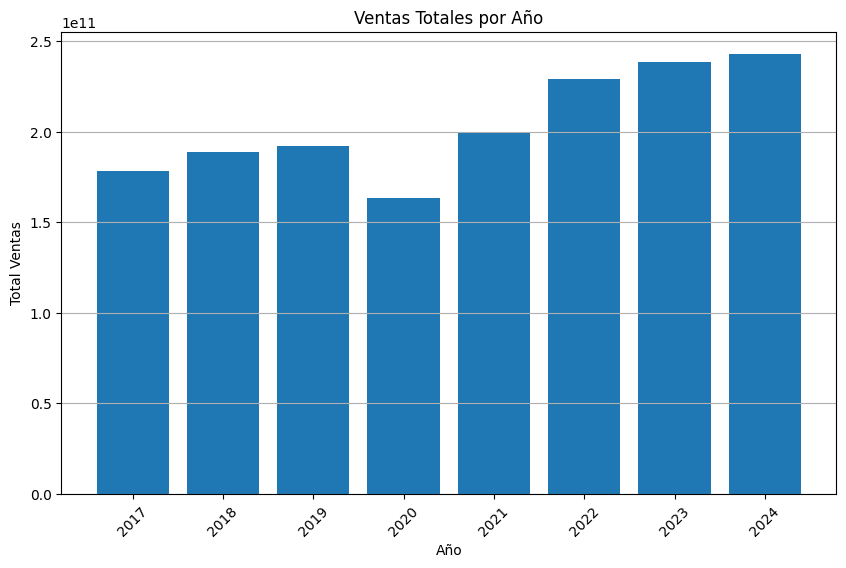

In [64]:
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Estadísticas descriptivas numéricas generales
estadisticas = df_final.describe().round(2)
print("📊 Estadísticas descriptivas generales:")
print(estadisticas)

# 2. Estadísticas descriptivas por año (sumas)
cols_monetarias = [
    'VENTAS_NETAS_TARIFA_12', 'VENTAS_NETAS_TARIFA_0', 'EXPORTACIONES',
    'COMPRAS_NETAS_TARIFA_12', 'COMPRAS_NETAS_TARIFA_0', 'IMPORTACIONES',
    'COMPRAS_RISE', 'TOTAL_COMPRAS', 'TOTAL_VENTAS'
]

estadisticas_anuales = df_final.groupby('AÑO')[cols_monetarias].sum().round(2)
print("\n📈 Estadísticas agregadas por año:")
print(estadisticas_anuales)

# 3. Graficar Total Ventas por año con matplotlib
plt.figure(figsize=(10,6))
plt.bar(estadisticas_anuales.index.astype(str), estadisticas_anuales['TOTAL_VENTAS'])
plt.title('Ventas Totales por Año')
plt.xlabel('Año')
plt.ylabel('Total Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4. Graficar Total Ventas por año con plotly (más interactivo)
fig = px.bar(estadisticas_anuales.reset_index(), x='AÑO', y='TOTAL_VENTAS',
             title='Ventas Totales por Año', labels={'TOTAL_VENTAS':'Ventas Totales', 'AÑO':'Año'})
fig.show()



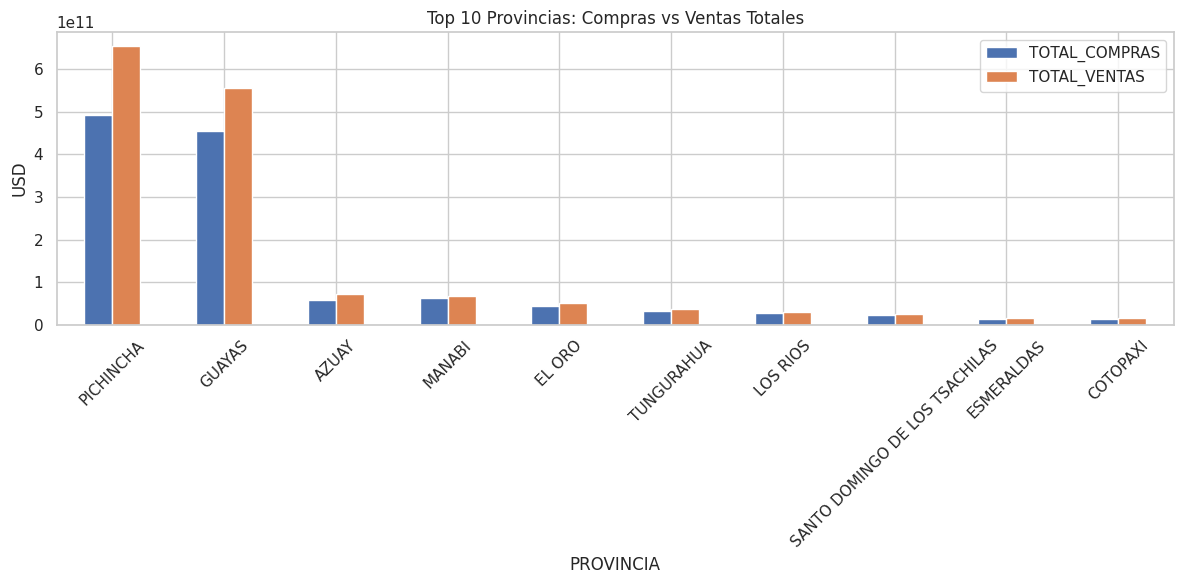

/tmp/ipython-input-66-1913914778.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




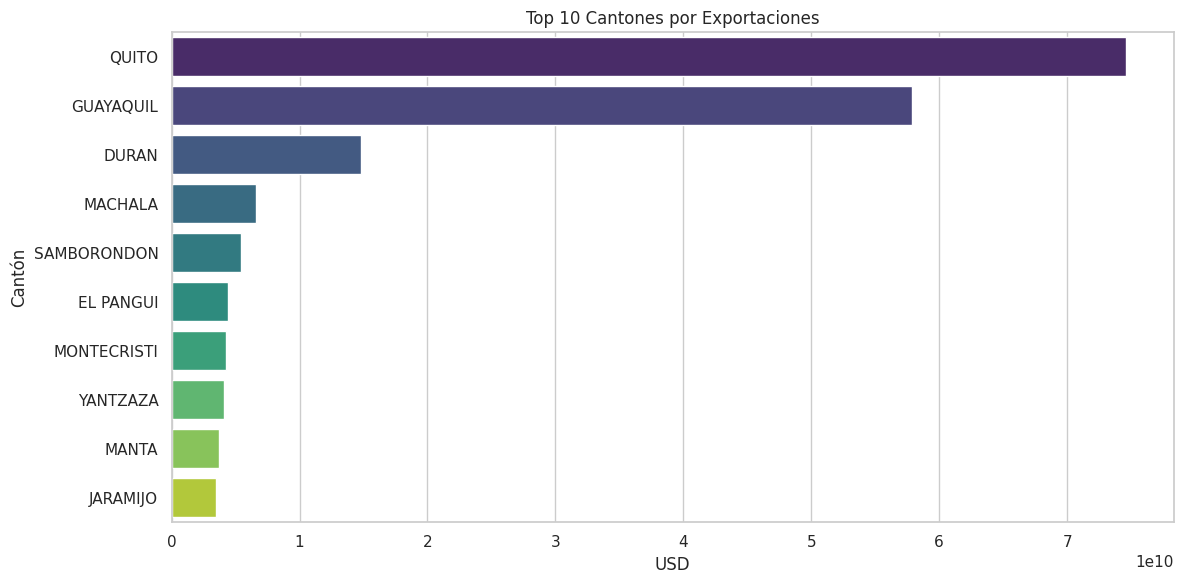

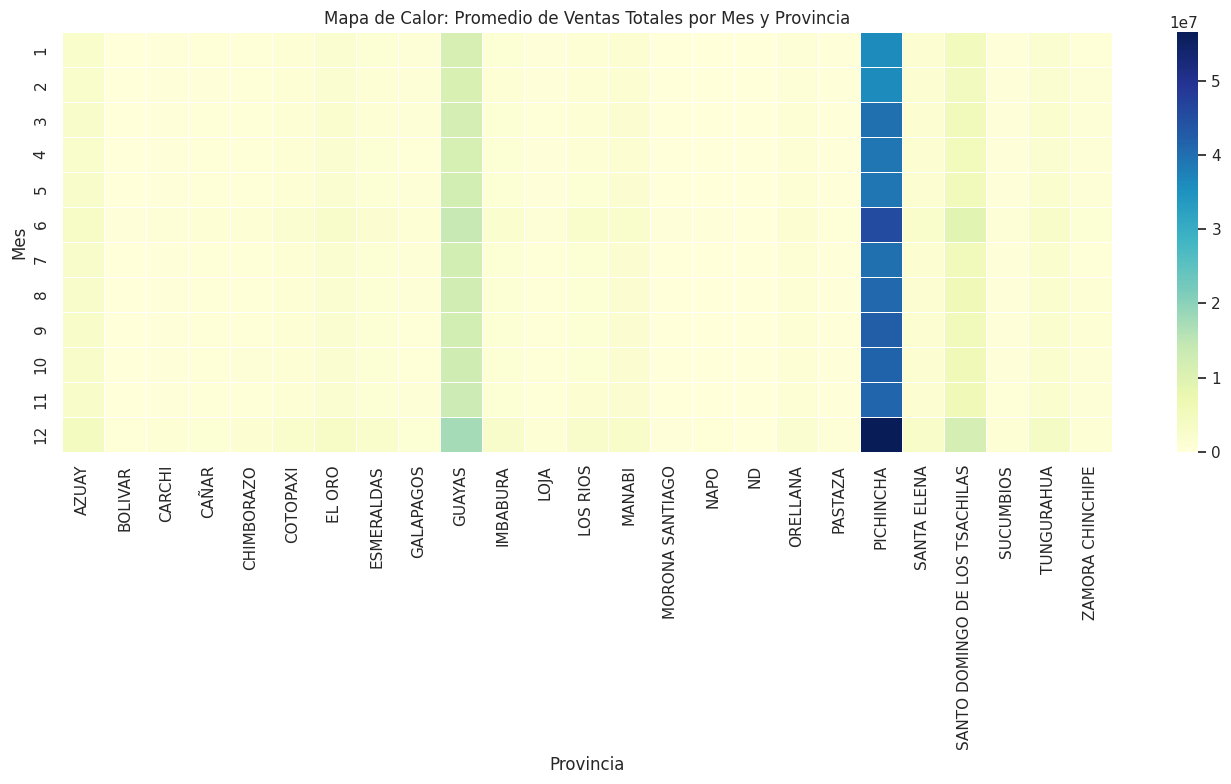

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

# Asegúrate de tener cargado df_final con los datos correctos
df_filtrado = df_final.dropna(subset=[
    'TOTAL_VENTAS', 'TOTAL_COMPRAS', 'EXPORTACIONES',
    'PROVINCIA', 'CANTON', 'MES'
])

# 1. Comparación Total Compras vs Total Ventas por Provincia (Top 10)
prov_stats = df_filtrado.groupby("PROVINCIA")[["TOTAL_COMPRAS", "TOTAL_VENTAS"]].sum().sort_values(by="TOTAL_VENTAS", ascending=False).head(10)
prov_stats.plot(kind="bar", figsize=(12, 6))
plt.title("Top 10 Provincias: Compras vs Ventas Totales")
plt.ylabel("USD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribución de Exportaciones por Cantón (Top 10)
top_export = df_filtrado.groupby("CANTON")["EXPORTACIONES"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_export.values, y=top_export.index, palette="viridis")
plt.title("Top 10 Cantones por Exportaciones")
plt.xlabel("USD")
plt.ylabel("Cantón")
plt.tight_layout()
plt.show()

# 3. Mapa de calor de promedio de ventas netas por mes y provincia
heatmap_data = df_filtrado.groupby(["MES", "PROVINCIA"])["TOTAL_VENTAS"].mean().unstack().fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de Calor: Promedio de Ventas Totales por Mes y Provincia")
plt.xlabel("Provincia")
plt.ylabel("Mes")
plt.tight_layout()
plt.show()

# 4. Gráfico interactivo con plotly: Total Ventas vs Total Compras por Provincia
prov_plot_data = df_filtrado.groupby("PROVINCIA")[["TOTAL_VENTAS", "TOTAL_COMPRAS"]].sum().reset_index()
fig = px.scatter(prov_plot_data, x="TOTAL_COMPRAS", y="TOTAL_VENTAS", text="PROVINCIA",
                 size="TOTAL_VENTAS", color="PROVINCIA",
                 title="Compras vs Ventas Totales por Provincia (Tamaño = Ventas)")
fig.update_traces(textposition='top center')
fig.show()
